In [1]:
from IPython.display import Image

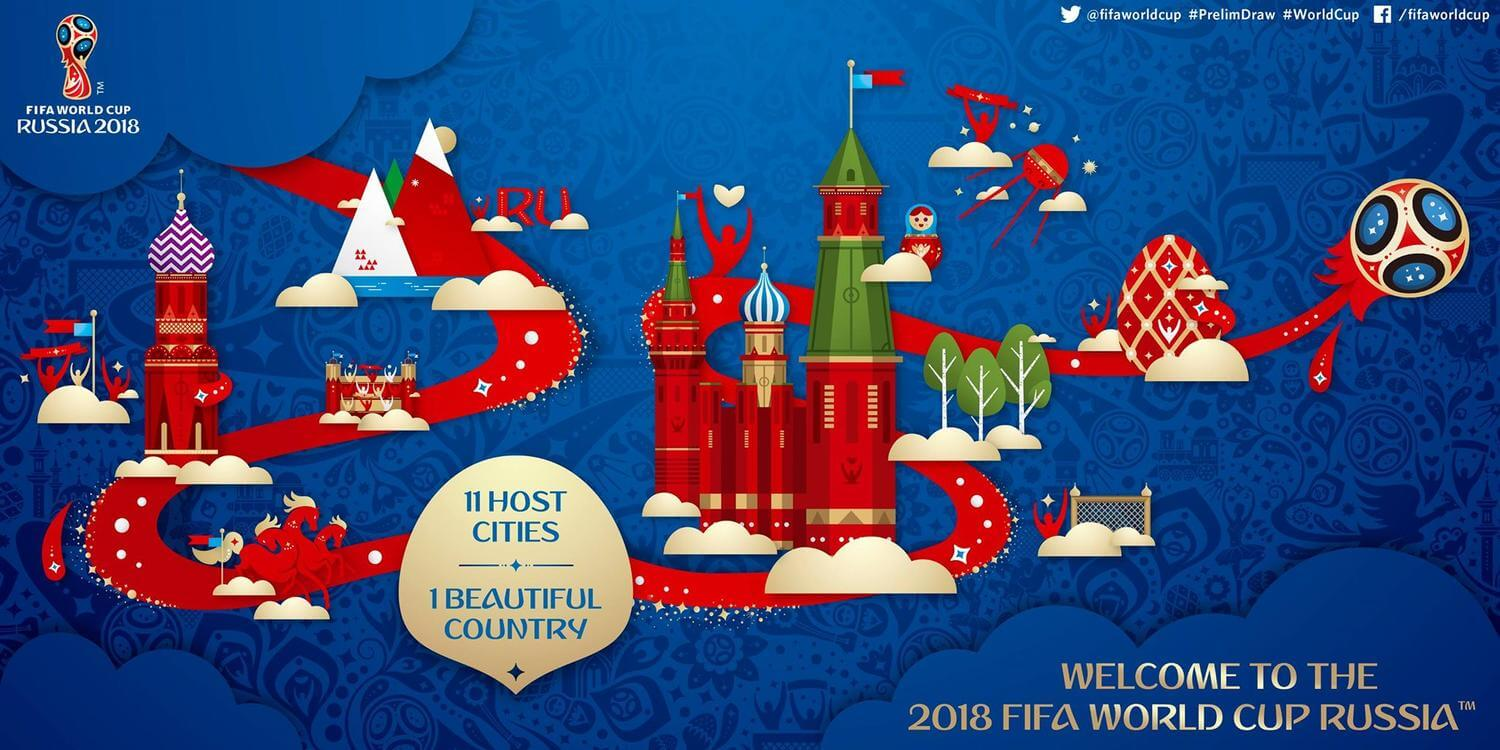

In [2]:
Image(filename="images/fifa-world-cup-2018.jpg")

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
from geopy.geocoders import Nominatim
import plotly.plotly as py

## 1 - Data Preparation
### 1.1 Load Data

In [2]:
FIFA18 = pd.read_csv('CompleteDataset.csv', low_memory=False)
FIFA18.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

Let's select the most interesting columns from loaded dataset:

In [3]:
interesting_columns = [
    'Name', 
    'Age',  
    'Nationality', 
    'Overall', 
    'Potential', 
    'Club', 
    'Value', 
    'Wage', 
    'Preferred Positions'
]
FIFA18 = pd.DataFrame(FIFA18, columns=interesting_columns)

### 1.2 Summarize Data

In [4]:
FIFA18.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK


In [5]:
FIFA18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Nationality            17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Preferred Positions    17981 non-null object
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


### 1.3 Preprocess Data
Right away I can see that values in columns: 'Value' and 'Wage' aren't numeric but objects. Thus I'll preprocess the data to make it usable. I will use short supporting function to convert values in those two columns into numbers. I will end up with two new columns 'ValueNum' and 'WageNum' that will contain numeric values.

In [6]:
# Supporting function for converting string values into numbers
def str2number(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])
    
FIFA18['ValueNum'] = FIFA18['Value'].apply(lambda x: str2number(x))
FIFA18['WageNum'] = FIFA18['Wage'].apply(lambda x: str2number(x))

To make things simpler, I select the first position from list as preferred and save it in 'Position' column.

In [7]:
FIFA18['Position'] = FIFA18['Preferred Positions'].str.split().str[0]

## 2 - Data Visualization
### 2.1 Age

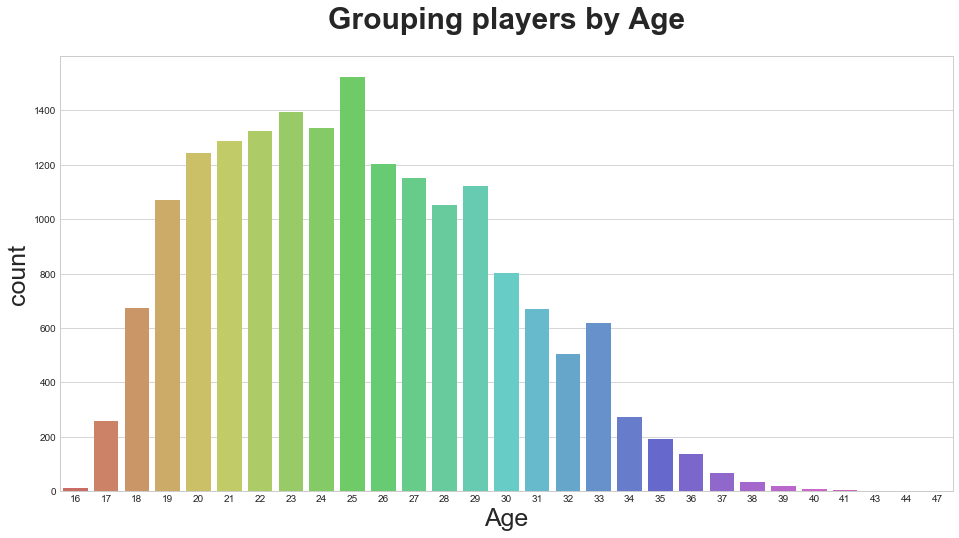

In [8]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Age', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Age", data=FIFA18, palette="hls");
plt.show()

### 2.2 Overall

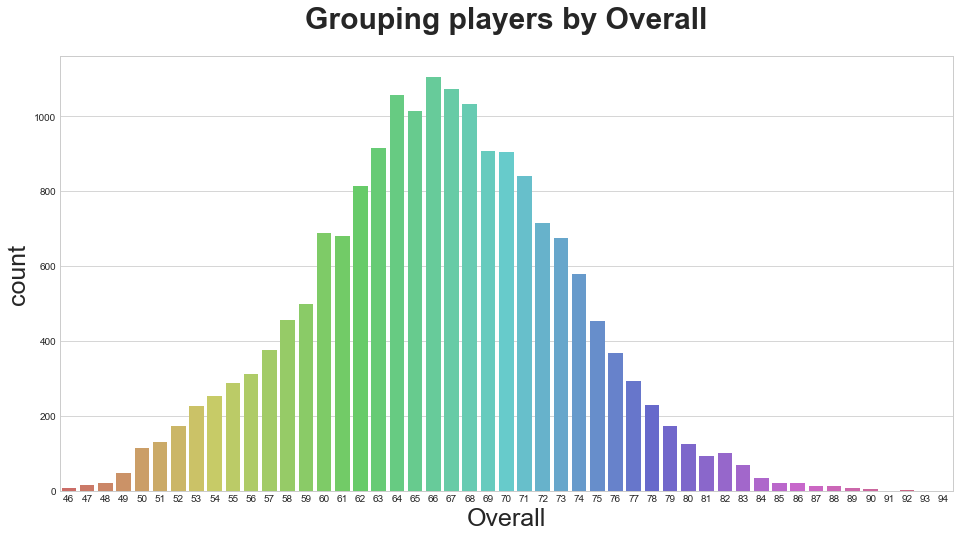

In [9]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Overall", data=FIFA18, palette="hls");
plt.show()

### 2.3 Preferred Position

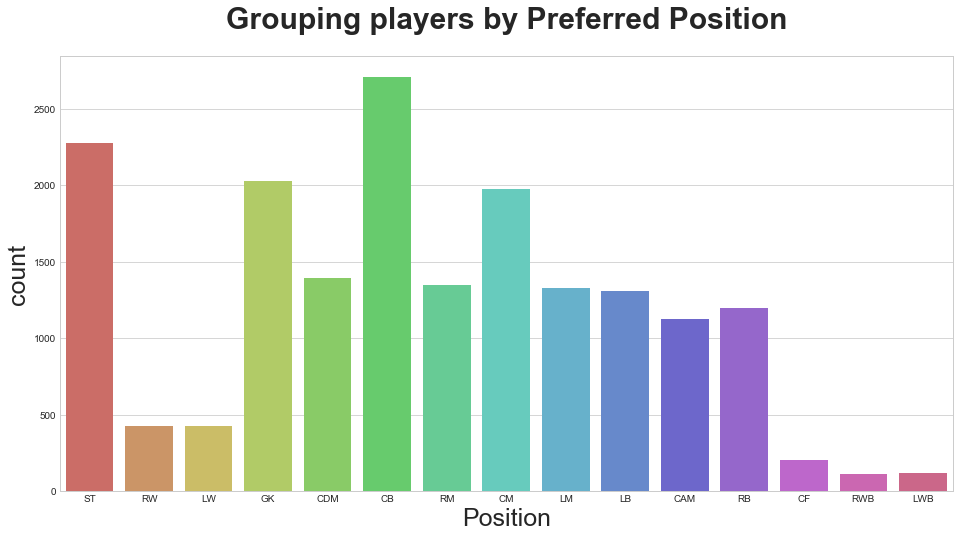

In [10]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Grouping players by Preferred Position', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Number of players', fontsize=25)
plt.ylabel('Players Age', fontsize=25)
sns.countplot(x="Position", data=FIFA18, palette="hls");
plt.show()

### 2.4 Nationality

In [11]:
# Grouping the data by countries
valcon = FIFA18.groupby("Nationality").size().reset_index(name="Count")

# Plotting the choropleth map
init_notebook_mode()
plotmap = [ dict(
        type = 'choropleth',
        locations = valcon["Nationality"],
        locationmode = 'country names',
        z = valcon["Count"],
        text = valcon["Nationality"],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = "Amount of Players"),
      ) ]

layout = dict(
    title = "Nationalities of FIFA 18 Players",
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=plotmap, layout=layout )
iplot(fig)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In case the plot.ly image doesn't show:

![nationalities](images/Nationalities.png)

In [12]:
FIFA18["Nationality"].value_counts().head(25)

England                1630
Germany                1140
Spain                  1019
France                  978
Argentina               965
Brazil                  812
Italy                   799
Colombia                592
Japan                   469
Netherlands             429
Republic of Ireland     417
United States           381
Chile                   375
Sweden                  368
Portugal                367
Mexico                  360
Denmark                 346
Poland                  337
Norway                  333
Korea Republic          330
Saudi Arabia            329
Russia                  306
Scotland                300
Turkey                  291
Belgium                 272
Name: Nationality, dtype: int64

I can see that the players are very centralized in Europe. To be precise, England, Germany, Spain, and France.

### 2.5 Value
Let's see the 20 players with highest value:

In [13]:
sorted_players = FIFA18.sort_values(["ValueNum"], ascending=False).head(20)
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Value"]].values

In [14]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Value</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Club,Position,Value
Neymar,25,Brazil,Paris Saint-Germain,LW,€123M
L. Messi,30,Argentina,FC Barcelona,RW,€105M
L. Suárez,30,Uruguay,FC Barcelona,ST,€97M
Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,€95.5M
R. Lewandowski,28,Poland,FC Bayern Munich,ST,€92M
E. Hazard,26,Belgium,Chelsea,LW,€90.5M
K. De Bruyne,26,Belgium,Manchester City,RM,€83M
T. Kroos,27,Germany,Real Madrid CF,CDM,€79M
P. Dybala,23,Argentina,Juventus,ST,€79M
G. Higuaín,29,Argentina,Juventus,ST,€77M


Let's make a scatter chart of the players' Value with respect to their Age and Overall:

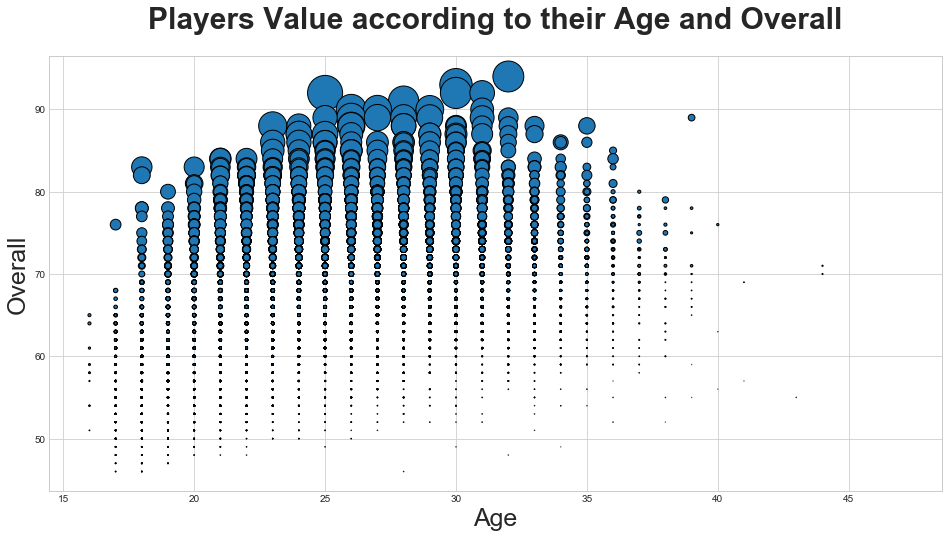

In [15]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Value according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["ValueNum"].values

plt.scatter(age, overall, s = value/100000, edgecolors='black')
plt.show()

### 2.6 Wage
Let's see the 20 players with highest wage:

In [16]:
sorted_players = FIFA18.sort_values(["WageNum"], ascending=False).head(20)
players = sorted_players[["Name" ,"Age" ,"Nationality" ,"Club" ,"Position" ,"Wage"]].values

In [17]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td>' + str(row[0]) + '</td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Position</th><th>Wage</th></tr>{}</table>'.format(table_content))
)

Name,Age,Nationality,Club,Position,Wage
Cristiano Ronaldo,32,Portugal,Real Madrid CF,ST,€565K
L. Messi,30,Argentina,FC Barcelona,RW,€565K
L. Suárez,30,Uruguay,FC Barcelona,ST,€510K
G. Bale,27,Wales,Real Madrid CF,RW,€370K
R. Lewandowski,28,Poland,FC Bayern Munich,ST,€355K
L. Modrić,31,Croatia,Real Madrid CF,CDM,€340K
T. Kroos,27,Germany,Real Madrid CF,CDM,€340K
S. Agüero,29,Argentina,Manchester City,ST,€325K
Sergio Ramos,31,Spain,Real Madrid CF,CB,€310K
E. Hazard,26,Belgium,Chelsea,LW,€295K


Let's make a scatter chart of the players' Wage with respect to their Age and Overall:

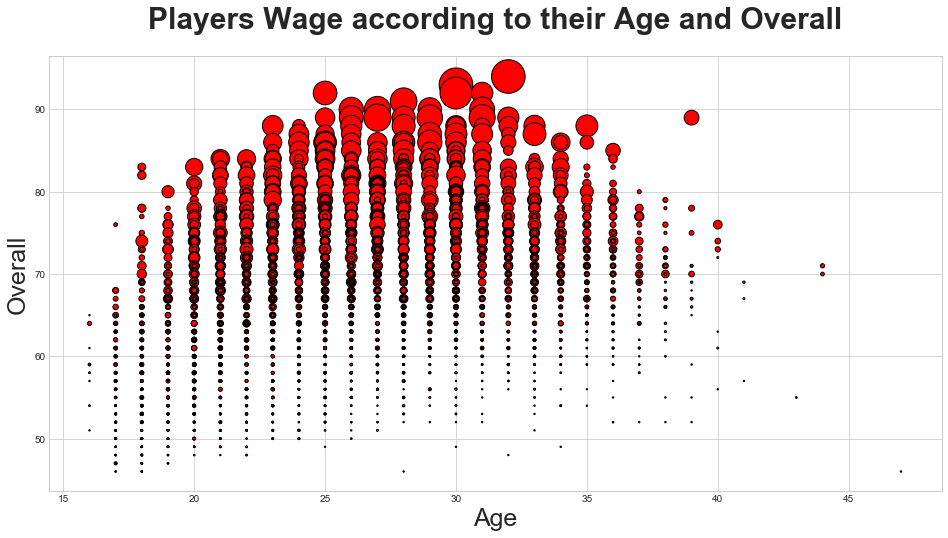

In [18]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Players Wage according to their Age and Overall', fontsize=30, fontweight='bold', y=1.05,)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Overall', fontsize=25)

age = FIFA18["Age"].values
overall = FIFA18["Overall"].values
value = FIFA18["WageNum"].values

plt.scatter(age, overall, s = value/500, edgecolors='black', color="red")
plt.show()

## 3 - Best Squad Analysis
For simplicity of this analysis, I only pull in data I am interested in:

In [19]:
FIFA18 = FIFA18[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Position', 'Value', 'Wage']]
FIFA18.head(10)

,Name,Age,Nationality,Overall,Potential,Club,Position,Value,Wage
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,ST,€95.5M,€565K
1,L. Messi,30,Argentina,93,93,FC Barcelona,RW,€105M,€565K
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,LW,€123M,€280K
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,ST,€97M,€510K
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,GK,€61M,€230K
5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,ST,€92M,€355K
6,De Gea,26,Spain,90,92,Manchester United,GK,€64.5M,€215K
7,E. Hazard,26,Belgium,90,91,Chelsea,LW,€90.5M,€295K
8,T. Kroos,27,Germany,90,90,Real Madrid CF,CDM,€79M,€340K
9,G. Higuaín,29,Argentina,90,90,Juventus,ST,€77M,€275K


### 3.1 Squad of Highest Overall Players
What's the best squad according to FIFA 18 purely based on overall rating?

In [20]:
def get_best_squad(formation):
    FIFA18_copy = FIFA18.copy()
    store = []
    
    # iterate through all positions in the input formation and get players with highest overall respective to the position
    for i in formation:
        store.append([
            i,
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(index = False),
            FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax()]]['Wage'].to_string(index = False)
        ])
                      
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'] == i]['Overall'].idxmax(), 
                         inplace = True)
    
    # return store with only necessary columns
    return pd.DataFrame(np.array(store).reshape(11,7), 
                        columns = ['Position', 'Player', 'Overall', 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [21]:
# 4-3-3
squad_433 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CM', 'CAM', 'RW', 'ST', 'LW']
print ('4-3-3')
print (get_best_squad(squad_433))

4-3-3
Position             Player Overall Age                 Club   Value   Wage
     GK           M. Neuer      92  31     FC Bayern Munich    €61M  €230K
     RB           Carvajal      84  25       Real Madrid CF    €32M  €195K
     CB       Sergio Ramos      90  31       Real Madrid CF    €52M  €310K
     CB       G. Chiellini      89  32             Juventus    €38M  €225K
     LB            Marcelo      87  29       Real Madrid CF    €38M  €250K
    CDM           T. Kroos      90  27       Real Madrid CF    €79M  €340K
     CM           N. Kanté      87  26              Chelsea  €52.5M  €190K
    CAM           Coutinho      86  25            Liverpool    €56M  €205K
     RW           L. Messi      93  30         FC Barcelona   €105M  €565K
     ST  Cristiano Ronaldo      94  32       Real Madrid CF  €95.5M  €565K
     LW             Neymar      92  25  Paris Saint-Germain   €123M  €280K


In [22]:
# 4-4-2
squad_442 = ['GK', 'RB', 'CB', 'CB', 'LB', 'RM', 'CM', 'CM', 'LM', 'ST', 'ST']
print ('4-4-2')
print (get_best_squad(squad_442))

4-4-2
Position             Player Overall Age               Club   Value   Wage
     GK           M. Neuer      92  31   FC Bayern Munich    €61M  €230K
     RB           Carvajal      84  25     Real Madrid CF    €32M  €195K
     CB       Sergio Ramos      90  31     Real Madrid CF    €52M  €310K
     CB       G. Chiellini      89  32           Juventus    €38M  €225K
     LB            Marcelo      87  29     Real Madrid CF    €38M  €250K
     RM       K. De Bruyne      89  26    Manchester City    €83M  €285K
     CM           N. Kanté      87  26            Chelsea  €52.5M  €190K
     CM           A. Vidal      87  30   FC Bayern Munich  €37.5M  €160K
     LM         C. Eriksen      87  25  Tottenham Hotspur    €65M  €165K
     ST  Cristiano Ronaldo      94  32     Real Madrid CF  €95.5M  €565K
     ST          L. Suárez      92  30       FC Barcelona    €97M  €510K


In [23]:
# 4-2-3-1
squad_4231 = ['GK', 'RB', 'CB', 'CB', 'LB', 'CDM', 'CDM', 'CAM', 'CAM', 'CAM', 'ST']
print ('4-2-3-1')
print (get_best_squad(squad_4231))

4-2-3-1
Position             Player Overall Age              Club   Value   Wage
     GK           M. Neuer      92  31  FC Bayern Munich    €61M  €230K
     RB           Carvajal      84  25    Real Madrid CF    €32M  €195K
     CB       Sergio Ramos      90  31    Real Madrid CF    €52M  €310K
     CB       G. Chiellini      89  32          Juventus    €38M  €225K
     LB            Marcelo      87  29    Real Madrid CF    €38M  €250K
    CDM           T. Kroos      90  27    Real Madrid CF    €79M  €340K
    CDM          L. Modrić      89  31    Real Madrid CF    €57M  €340K
    CAM           Coutinho      86  25         Liverpool    €56M  €205K
    CAM      R. Nainggolan      86  29              Roma  €42.5M  €130K
    CAM      Cesc Fàbregas      86  30           Chelsea    €41M  €210K
     ST  Cristiano Ronaldo      94  32    Real Madrid CF  €95.5M  €565K


Alright, now let's move onto studying different squad's impact on Nationality teams. First let's modifiy above get_summary and get_best_squad functions for Nationality:

In [24]:
def get_best_squad_n(formation, nationality, measurement = 'Overall'):
    FIFA18_copy = FIFA18.copy()
    FIFA18_copy = FIFA18_copy[FIFA18_copy['Nationality'] == nationality]
    store = []
    
    for i in formation:
        store.append([
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Position'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Name'].to_string(index = False), 
            FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].max(),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Age'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Club'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Value'].to_string(index = False),
            FIFA18_copy.loc[[FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax()]]['Wage'].to_string(index = False)
        ])
        
        FIFA18_copy.drop(FIFA18_copy[FIFA18_copy['Position'].str.contains(i)][measurement].idxmax(), 
                         inplace = True)
    
    return np.mean([x[2] for x in store]).round(2), pd.DataFrame(np.array(store).reshape(11,7), 
                                                                 columns = ['Position', 'Player', measurement, 'Age', 'Club', 'Value', 'Wage']).to_string(index = False)

In [25]:
def get_summary_n(squad_list, squad_name, nationality_list):
    summary = []

    for i in nationality_list:
        count = 0
        for j in squad_list:
            
            # for overall rating
            O_temp_rating, _  = get_best_squad_n(formation = j, nationality = i, measurement = 'Overall')
            
            # for potential rating & corresponding value
            P_temp_rating, _ = get_best_squad_n(formation = j, nationality = i, measurement = 'Potential')
            
            summary.append([i, squad_name[count], O_temp_rating.round(2), P_temp_rating.round(2)])    
            count += 1
    
    return summary

Also let's make our squad choices more strict:

In [26]:
squad_343_strict = ['GK', 'CB', 'CB', 'CB', 'RB|RWB', 'CM|CDM', 'CM|CDM', 'LB|LWB', 'RM|RW', 'ST|CF', 'LM|LW']
squad_442_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'RM', 'CM|CDM', 'CM|CAM', 'LM', 'ST|CF', 'ST|CF']
squad_4312_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'CAM|CF', 'ST|CF', 'ST|CF']
squad_433_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CAM|CDM', 'CM|CAM|CDM', 'RM|RW', 'ST|CF', 'LM|LW']
squad_4231_strict = ['GK', 'RB|RWB', 'CB', 'CB', 'LB|LWB', 'CM|CDM', 'CM|CDM', 'RM|RW', 'CAM', 'LM|LW', 'ST|CF']

In [27]:
squad_list = [squad_343_strict, squad_442_strict, squad_4312_strict, squad_433_strict, squad_4231_strict]
squad_name = ['3-4-3', '4-4-2', '4-3-1-2', '4-3-3', '4-2-3-1']

### 3.2 France
Let's explore different squad possibility of France and how it affects the ratings:

In [28]:
France = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['France'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
France.set_index('Nationality', inplace = True)
France[['Overall', 'Potential']] = France[['Overall', 'Potential']].astype(float)

print (France)

               Squad  Overall  Potential
Nationality                             
France         3-4-3    84.55      89.55
France         4-4-2    84.00      89.91
France       4-3-1-2    84.55      89.64
France         4-3-3    84.64      89.91
France       4-2-3-1    84.55      89.91


So we can say that France has the best squard as 4-3-3 for the current squad; and 4-4-2, 4-3-3, and 4-2-3-1 for the future squad based on team ratings. Let's check out the best 11 squad line-up of France in 4-3-3 for current rating as well as 4-4-2 for potential rating:

In [29]:
rating_433_FR_Overall, best_list_433_FR_Overall = get_best_squad_n(squad_433_strict, 'France', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_FR_Overall))
print(best_list_433_FR_Overall)

-Overall-
Average rating: 84.6
Position        Player Overall Age                     Club   Value   Wage
     GK     H. Lloris      88  30        Tottenham Hotspur    €38M  €165K
     RB      K. Zouma      79  22               Stoke City    €15M   €96K
     CB     R. Varane      85  24           Real Madrid CF  €46.5M  €175K
     CB    A. Laporte      84  23  Athletic Club de Bilbao  €35.5M   €36K
     LB    L. Kurzawa      80  24      Paris Saint-Germain  €16.5M   €69K
     CM      N. Kanté      87  26                  Chelsea  €52.5M  €190K
    CDM      P. Pogba      87  24        Manchester United  €66.5M  €195K
     CM    B. Matuidi      85  30                 Juventus  €28.5M  €145K
     RM    F. Thauvin      82  24   Olympique de Marseille    €28M   €40K
     ST    K. Benzema      86  29           Real Madrid CF  €44.5M  €295K
     LW  A. Griezmann      88  26          Atlético Madrid    €75M  €150K


In [30]:
rating_442_FR_Potential, best_list_442_FR_Potential = get_best_squad_n(squad_442_strict, 'France', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_442_FR_Potential))
print(best_list_442_FR_Potential)

-Potential-
Average rating: 89.9
Position        Player Potential Age                     Club   Value   Wage
     GK     A. Lafont        89  18              Toulouse FC  €11.5M   €10K
     RB      K. Zouma        86  22               Stoke City    €15M   €96K
     CB     R. Varane        92  24           Real Madrid CF  €46.5M  €175K
     CB    A. Laporte        89  23  Athletic Club de Bilbao  €35.5M   €36K
     LB  L. Hernández        88  21          Atlético Madrid  €13.5M   €36K
     RM       A. Pléa        86  24                 OGC Nice  €20.5M   €41K
    CDM      P. Pogba        92  24        Manchester United  €66.5M  €195K
    CAM    O. Dembélé        92  20             FC Barcelona    €40M  €150K
     LM      T. Lemar        91  21                AS Monaco  €38.5M   €37K
     ST     K. Mbappé        94  18      Paris Saint-Germain  €41.5M   €31K
     ST    A. Martial        90  21        Manchester United    €33M  €115K


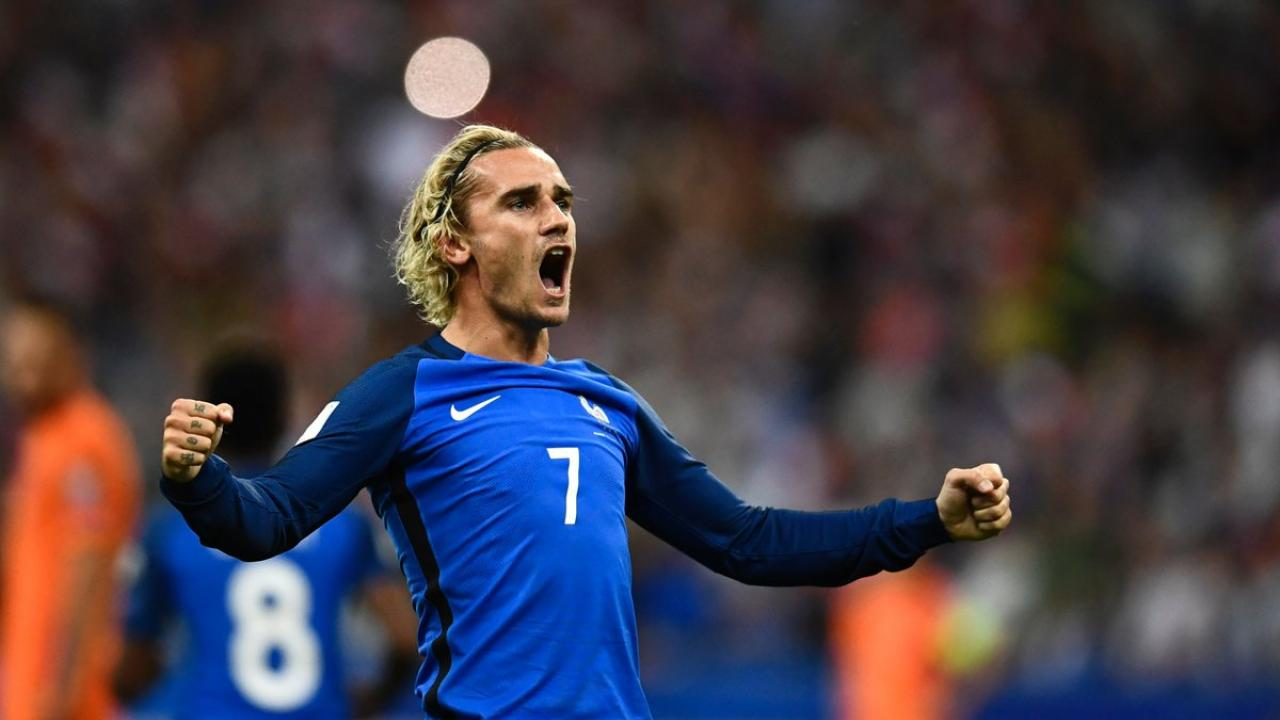

In [3]:
Image(filename="images/griezmann.jpeg")

### 3.3 Germany
The holding champion is certainly a heavy candidate for this year's 1st place:

In [31]:
Germany = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Germany'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Germany.set_index('Nationality', inplace = True)
Germany[['Overall', 'Potential']] = Germany[['Overall', 'Potential']].astype(float)

print (Germany)

               Squad  Overall  Potential
Nationality                             
Germany        3-4-3    86.27      88.55
Germany        4-4-2    85.09      88.36
Germany      4-3-1-2    85.36      88.00
Germany        4-3-3    86.27      88.55
Germany      4-2-3-1    86.09      88.55


As you can see, Germany's current ratings peak with either 3-4-3 or 4-3-3 formation; while those 2 plus 4-2-3-1 are their best options for the future. With that, I'll show Germany's best 11 squad with 4-3-3 for current ratings and 4-2-3-1 for potential ratings.

In [32]:
rating_433_GER_Overall, best_list_433_GER_Overall = get_best_squad_n(squad_433_strict, 'Germany', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_GER_Overall))
print(best_list_433_GER_Overall)

-Overall-
Average rating: 86.3
Position       Player Overall Age               Club   Value   Wage
     GK     M. Neuer      92  31   FC Bayern Munich    €61M  €230K
     RB   A. Rüdiger      82  24            Chelsea  €24.5M  €105K
     CB   J. Boateng      88  28   FC Bayern Munich    €48M  €215K
     CB   M. Hummels      88  28   FC Bayern Munich    €48M  €215K
     LB    J. Hector      80  27         1. FC Köln    €14M   €42K
    CDM     T. Kroos      90  27     Real Madrid CF    €79M  €340K
    CDM  I. Gündoğan      85  26    Manchester City    €46M  €190K
    CDM   S. Khedira      84  30           Juventus    €29M  €160K
     RW      M. Özil      88  28            Arsenal    €60M  €265K
     ST    T. Müller      86  27   FC Bayern Munich  €47.5M  €190K
     LW      M. Reus      86  28  Borussia Dortmund    €45M  €120K


In [33]:
rating_4231_GER_Potential, best_list_4231_GER_Potential = get_best_squad_n(squad_4231_strict, 'Germany', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_GER_Potential))
print(best_list_4231_GER_Potential)

-Potential-
Average rating: 88.5
Position       Player Potential Age                 Club   Value   Wage
     GK     M. Neuer        92  31     FC Bayern Munich    €61M  €230K
     RB   A. Rüdiger        86  24              Chelsea  €24.5M  €105K
     CB      N. Süle        89  21     FC Bayern Munich  €30.5M   €78K
     CB   J. Boateng        88  28     FC Bayern Munich    €48M  €215K
     LB  B. Henrichs        86  20  Bayer 04 Leverkusen    €11M   €36K
    CDM     T. Kroos        90  27       Real Madrid CF    €79M  €340K
    CDM  L. Goretzka        88  22        FC Schalke 04    €30M   €46K
     RW      M. Özil        88  28              Arsenal    €60M  €265K
    CAM    J. Brandt        88  21  Bayer 04 Leverkusen    €22M   €49K
     LM      L. Sané        91  21      Manchester City  €34.5M  €125K
     CF   K. Havertz        88  18  Bayer 04 Leverkusen     €8M   €25K


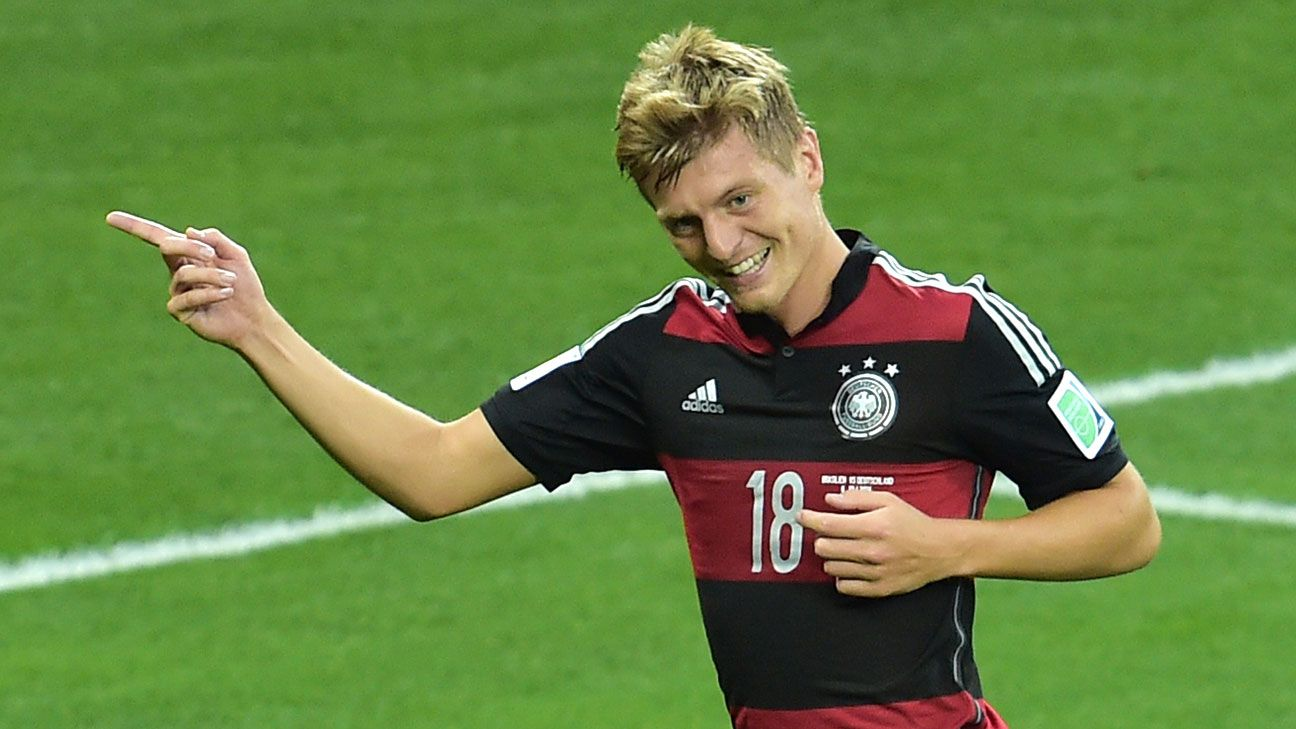

In [4]:
Image(filename="images/kroos.jpeg")

### 3.4 Spain
How about our 2010's winner?

In [34]:
Spain = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Spain'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Spain.set_index('Nationality', inplace = True)
Spain[['Overall', 'Potential']] = Spain[['Overall', 'Potential']].astype(float)

print (Spain)

               Squad  Overall  Potential
Nationality                             
Spain          3-4-3    86.27      88.82
Spain          4-4-2    86.45      88.73
Spain        4-3-1-2    86.55      88.09
Spain          4-3-3    86.64      89.00
Spain        4-2-3-1    86.64      89.00


Well, Spain does best with either 4-3-3 or 4-2-3-1 for both current and potential rating. I'll choose 4-2-3-1 for the current squad and 4-3-3 for the potential squad.

In [35]:
rating_4231_ESP_Overall, best_list_4231_ESP_Overall = get_best_squad_n(squad_4231_strict, 'Spain', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_ESP_Overall))
print(best_list_4231_ESP_Overall)

-Overall-
Average rating: 86.6
Position           Player Overall Age               Club   Value   Wage
     GK           De Gea      90  26  Manchester United  €64.5M  €215K
     RB         Carvajal      84  25     Real Madrid CF    €32M  €195K
     CB     Sergio Ramos      90  31     Real Madrid CF    €52M  €310K
     CB            Piqué      87  30       FC Barcelona  €37.5M  €240K
     LB       Jordi Alba      85  28       FC Barcelona  €30.5M  €215K
    CDM           Thiago      88  26   FC Bayern Munich  €70.5M  €225K
     CM  Sergio Busquets      86  28       FC Barcelona    €36M  €250K
     RM        Juan Mata      84  29  Manchester United  €30.5M  €195K
    CAM    Cesc Fàbregas      86  30            Chelsea    €41M  €210K
     LM      David Silva      87  31    Manchester City    €44M  €220K
     ST      Diego Costa      86  28            Chelsea    €46M  €235K


In [36]:
rating_433_ESP_Potential, best_list_433_ESP_Potential = get_best_squad_n(squad_433_strict, 'Spain', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ESP_Potential))
print(best_list_433_ESP_Potential)

-Potential-
Average rating: 89.0
Position           Player Potential Age               Club   Value   Wage
     GK           De Gea        92  26  Manchester United  €64.5M  €215K
     RB  Héctor Bellerín        88  22            Arsenal    €21M   €91K
     CB     Sergio Ramos        90  31     Real Madrid CF    €52M  €310K
     CB            Piqué        87  30       FC Barcelona  €37.5M  €240K
     LB      Azpilicueta        87  27            Chelsea  €37.5M  €160K
    CDM           Thiago        90  26   FC Bayern Munich  €70.5M  €225K
    CAM    Dani Ceballos        88  20     Real Madrid CF  €16.5M  €105K
    CDM   Diego Llorente        87  23      Real Sociedad    €16M   €29K
     RM             Saúl        90  22    Atlético Madrid    €32M   €59K
     ST           Morata        88  24            Chelsea    €41M  €170K
     LW    Marco Asensio        92  21     Real Madrid CF    €46M  €175K


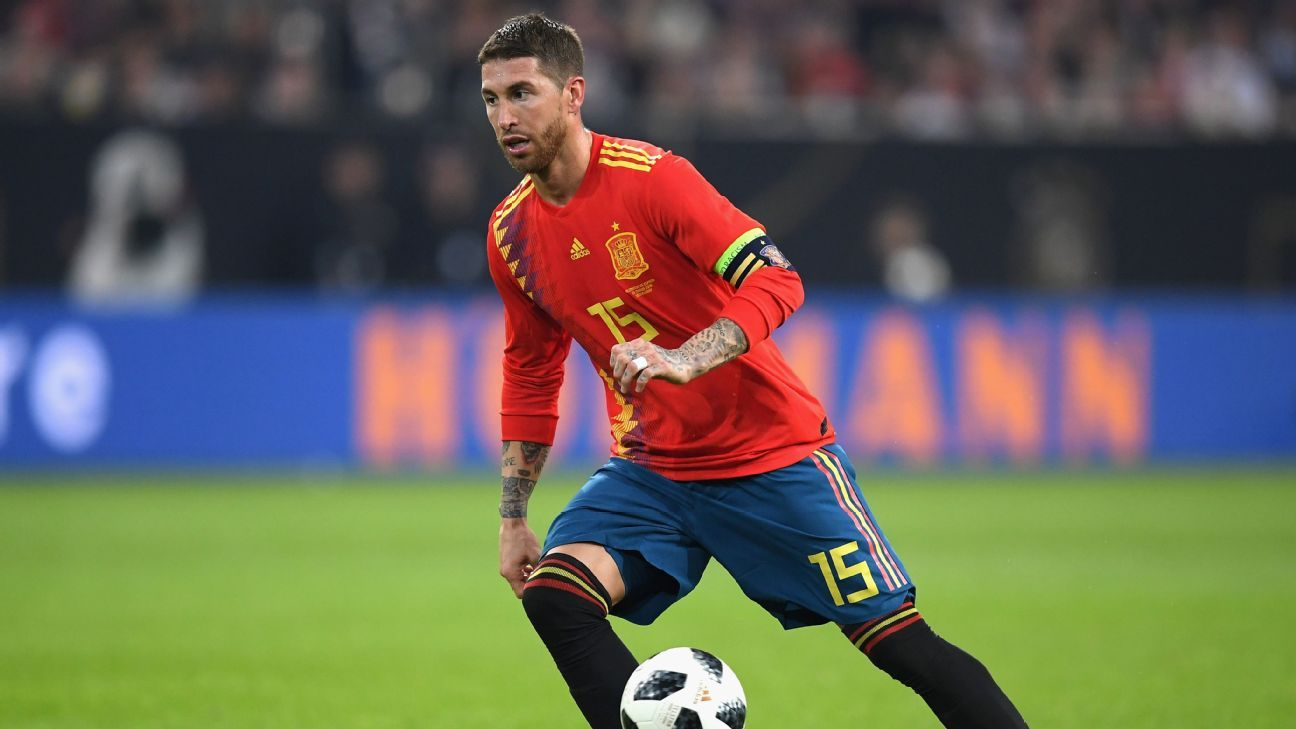

In [5]:
Image(filename="images/ramos.jpg")

### 3.5 England
Although having the best soccer league in Europe, England did not seem to do that well at the national level. Let's figure out their options for the upcoming World Cup:

In [37]:
England = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['England'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
England.set_index('Nationality', inplace = True)
England[['Overall', 'Potential']] = England[['Overall', 'Potential']].astype(float)

print (England)

               Squad  Overall  Potential
Nationality                             
England        3-4-3    82.64      87.18
England        4-4-2    82.64      87.27
England      4-3-1-2    82.27      86.73
England        4-3-3    82.73      87.36
England      4-2-3-1    82.36      87.36


England should stick to 4-3-3 with their current squad and either 4-3-3 or 4-2-3-1 with their potential squad. Thus, I'll choose 4-3-3 and 4-2-3-1 respectively.

In [38]:
rating_433_ENG_Overall, best_list_433_ENG_Overall = get_best_squad_n(squad_433_strict, 'England', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_ENG_Overall))
print(best_list_433_ENG_Overall)

-Overall-
Average rating: 82.7
Position        Player Overall Age               Club   Value   Wage
     GK       J. Hart      82  30    West Ham United    €14M  €110K
    RWB     K. Walker      83  27    Manchester City    €24M  €130K
     CB     G. Cahill      84  31            Chelsea    €21M  €160K
     CB      M. Keane      81  24            Everton    €21M   €91K
    LWB       D. Rose      82  26  Tottenham Hotspur    €21M   €99K
     CM    A. Lallana      83  29          Liverpool    €25M  €135K
     CM       E. Dier      82  23  Tottenham Hotspur    €25M   €85K
     CM  J. Henderson      82  27          Liverpool  €21.5M  €115K
     RW    R. Barkley      81  23            Everton    €24M  €105K
     ST       H. Kane      86  23  Tottenham Hotspur    €59M  €165K
     LM       D. Alli      84  21  Tottenham Hotspur    €43M  €115K


In [39]:
rating_4231_ENG_Potential, best_list_4231_ENG_Potential = get_best_squad_n(squad_4231_strict, 'England', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_ENG_Potential))
print(best_list_4231_ENG_Potential)

-Potential-
Average rating: 87.4
Position                 Player Potential Age               Club   Value   Wage
     GK             J. Butland        87  24         Stoke City    €18M   €50K
    RWB  A. Oxlade-Chamberlain        85  23          Liverpool    €20M  €105K
     CB               M. Keane        87  24            Everton    €21M   €91K
     CB              J. Stones        85  23    Manchester City  €14.5M  €105K
     LB                L. Shaw        84  21  Manchester United    €14M   €91K
     CM               A. Gomes        90  16  Manchester United   €975K    €9K
     CM                E. Dier        87  23  Tottenham Hotspur    €25M   €85K
     RM            M. Rashford        89  19  Manchester United    €22M   €74K
    CAM             M. Edwards        87  18  Tottenham Hotspur   €1.2M   €11K
     LM                D. Alli        90  21  Tottenham Hotspur    €43M  €115K
     ST                H. Kane        90  23  Tottenham Hotspur    €59M  €165K


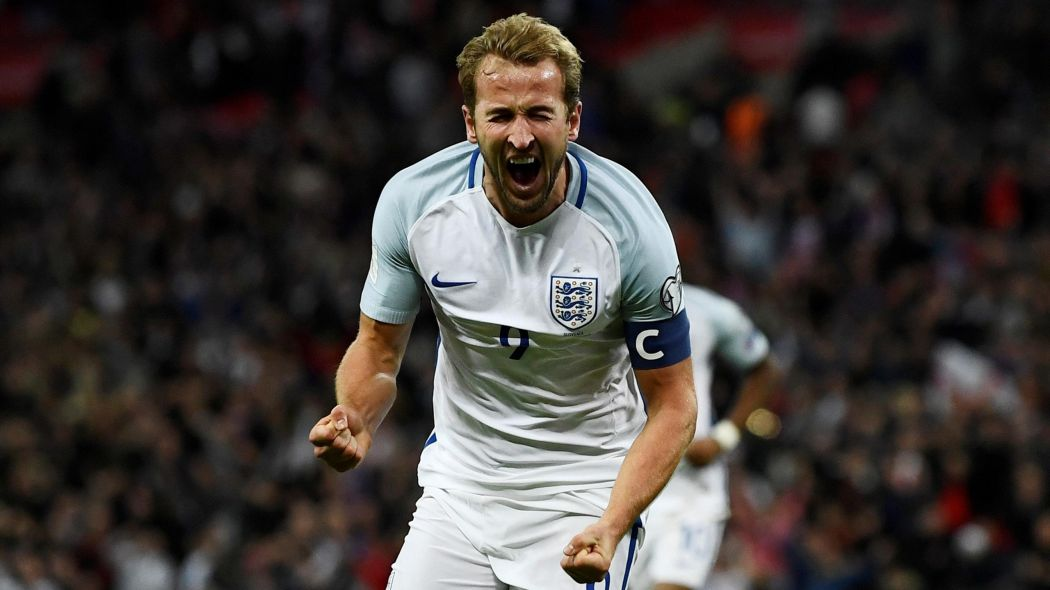

In [6]:
Image(filename="images/kane.jpg")

### 3.6 Brazil
Having won the World Cup the most times in history, the Samba team will no doubt be one of the top candidates for this summer in Russia.

In [40]:
Brazil = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Brazil'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Brazil.set_index('Nationality', inplace = True)
Brazil[['Overall', 'Potential']] = Brazil[['Overall', 'Potential']].astype(float)

print (Brazil)

               Squad  Overall  Potential
Nationality                             
Brazil         3-4-3    85.36      88.45
Brazil         4-4-2    84.73      88.00
Brazil       4-3-1-2    84.64      88.00
Brazil         4-3-3    85.45      88.73
Brazil       4-2-3-1    85.36      88.73


As you can see, Brazil has similar options like England. I'll go with 4-3-3 for the current rating and 4-2-3-1 for the potential rating.

In [41]:
rating_433_BRA_Overall, best_list_433_BRA_Overall = get_best_squad_n(squad_433_strict, 'Brazil', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BRA_Overall))
print(best_list_433_BRA_Overall)

-Overall-
Average rating: 85.5
Position         Player Overall Age                 Club   Value   Wage
     GK        Ederson      83  23      Manchester City    €26M   €87K
     RB     Dani Alves      84  34  Paris Saint-Germain     €9M  €115K
     CB   Thiago Silva      88  32  Paris Saint-Germain    €34M  €175K
     CB     David Luiz      86  30              Chelsea    €33M  €190K
     LB        Marcelo      87  29       Real Madrid CF    €38M  €250K
    CDM       Casemiro      85  25       Real Madrid CF    €42M  €195K
    CAM       Coutinho      86  25            Liverpool    €56M  €205K
    CAM        Willian      84  28              Chelsea  €31.5M  €200K
     RM  Douglas Costa      82  26             Juventus    €24M  €115K
     CF          Jonas      83  33           SL Benfica  €16.5M   €21K
     LW         Neymar      92  25  Paris Saint-Germain   €123M  €280K


In [42]:
rating_4231_BRA_Potential, best_list_4231_BRA_Potential = get_best_squad_n(squad_4231_strict, 'Brazil', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_4231_BRA_Potential))
print(best_list_4231_BRA_Potential)

-Potential-
Average rating: 88.7
Position         Player Potential Age                   Club   Value   Wage
     GK        Ederson        89  23        Manchester City    €26M   €87K
     RB     Dani Alves        84  34    Paris Saint-Germain     €9M  €115K
     CB     Marquinhos        89  23    Paris Saint-Germain  €30.5M   €75K
     CB   Thiago Silva        88  32    Paris Saint-Germain    €34M  €175K
     LB        Marcelo        87  29         Real Madrid CF    €38M  €250K
    CDM       Casemiro        89  25         Real Madrid CF    €42M  €195K
    CDM        Fabinho        88  23              AS Monaco  €29.5M   €37K
     RM         Malcom        87  20  Girondins de Bordeaux  €24.5M   €47K
    CAM       Coutinho        89  25              Liverpool    €56M  €205K
     LW         Neymar        94  25    Paris Saint-Germain   €123M  €280K
     ST  Gabriel Jesus        92  20        Manchester City    €31M  €115K


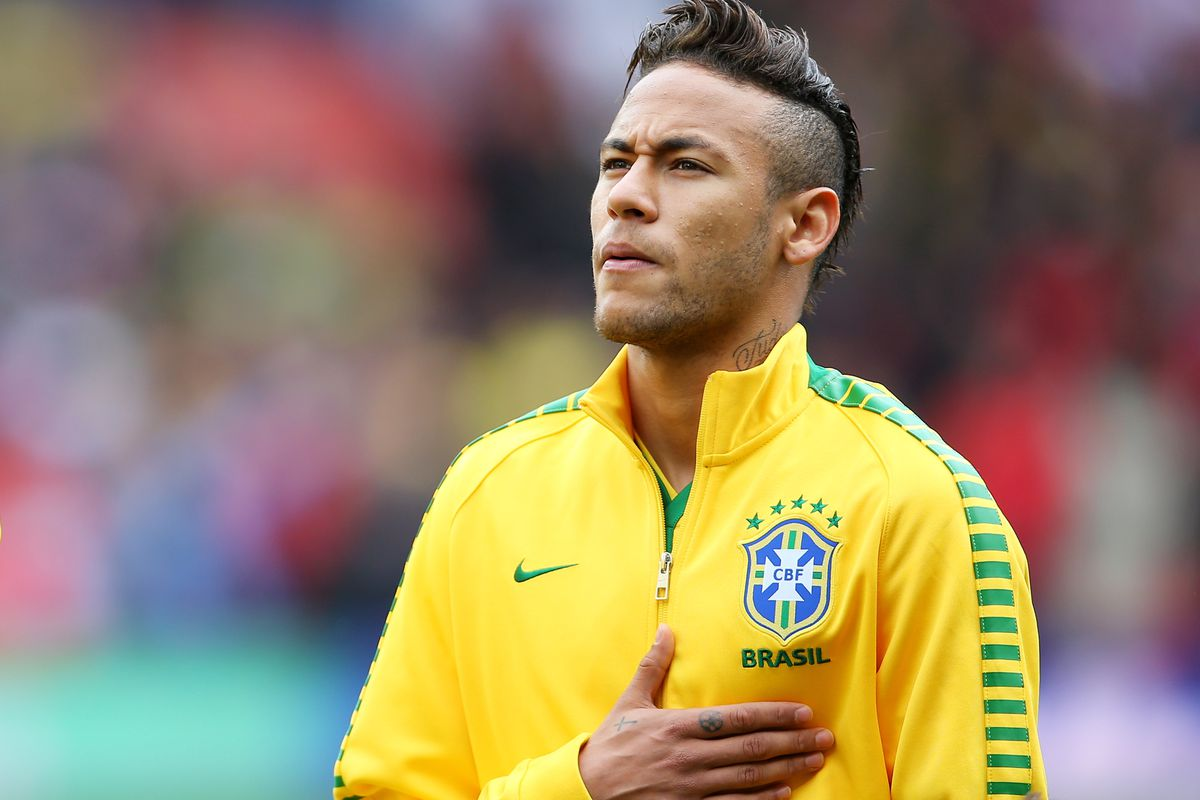

In [7]:
Image(filename="images/neymar.jpg")

### 3.7 Argentina
Lionel Messi is still waiting for the only trophy he hasn't gotten yet in his career. Can he carry Argentina to the top after going short in the final 4 years ago?

In [43]:
Argentina = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Argentina'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Argentina.set_index('Nationality', inplace = True)
Argentina[['Overall', 'Potential']] = Argentina[['Overall', 'Potential']].astype(float)

print (Argentina)

               Squad  Overall  Potential
Nationality                             
Argentina      3-4-3    84.27      87.36
Argentina      4-4-2    83.45      87.27
Argentina    4-3-1-2    83.55      86.73
Argentina      4-3-3    84.27      87.36
Argentina    4-2-3-1    84.00      87.09


Both 3-4-3 and 4-3-3 fare very well for the current and potential ratings of Argentine players. For the sake of diversity, I'll choose 3-4-3 for their current squad and 4-3-3 for their future squad.

In [44]:
rating_343_ARG_Overall, best_list_343_ARG_Overall = get_best_squad_n(squad_343_strict, 'Argentina', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_343_ARG_Overall))
print(best_list_343_ARG_Overall)

-Overall-
Average rating: 84.3
Position        Player Overall Age                 Club   Value   Wage
     GK      G. Rulli      83  25        Real Sociedad  €25.5M   €28K
     CB   N. Otamendi      83  29      Manchester City    €20M  €140K
     CB  M. Musacchio      83  26                Milan    €27M  €105K
     CB      E. Garay      83  30          Valencia CF    €19M   €40K
     RB   P. Zabaleta      79  32      West Ham United     €7M   €99K
     CM     E. Banega      83  29           Sevilla FC  €25.5M   €27K
     CM     L. Biglia      83  31                Milan  €17.5M  €105K
     LB       M. Rojo      82  27    Manchester United    €21M  €130K
     RW      L. Messi      93  30         FC Barcelona   €105M  €565K
     ST    G. Higuaín      90  29             Juventus    €77M  €275K
     LW   A. Di María      85  29  Paris Saint-Germain  €37.5M  €145K


In [45]:
rating_433_ARG_Potential, best_list_433_ARG_Potential = get_best_squad_n(squad_433_strict, 'Argentina', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_ARG_Potential))
print(best_list_433_ARG_Potential)

-Potential-
Average rating: 87.4
Position        Player Potential Age                  Club   Value   Wage
     GK      G. Rulli        89  25         Real Sociedad  €25.5M   €28K
     RB      J. Figal        82  23         Independiente     €8M   €16K
     CB  M. Musacchio        86  26                 Milan    €27M  €105K
     CB    E. Mammana        86  21  Zenit St. Petersburg    €10M   €36K
     LB       M. Rojo        83  27     Manchester United    €21M  €130K
     CM      E. Barco        90  18         Independiente   €6.5M    €8K
     CM   G. Lo Celso        86  21   Paris Saint-Germain    €10M   €48K
    CDM  S. Ascacibar        86  20         VfB Stuttgart     €7M   €17K
     RW      L. Messi        93  30          FC Barcelona   €105M  €565K
     ST     P. Dybala        93  23              Juventus    €79M  €215K
     LM    M. Lanzini        87  24       West Ham United  €24.5M   €95K


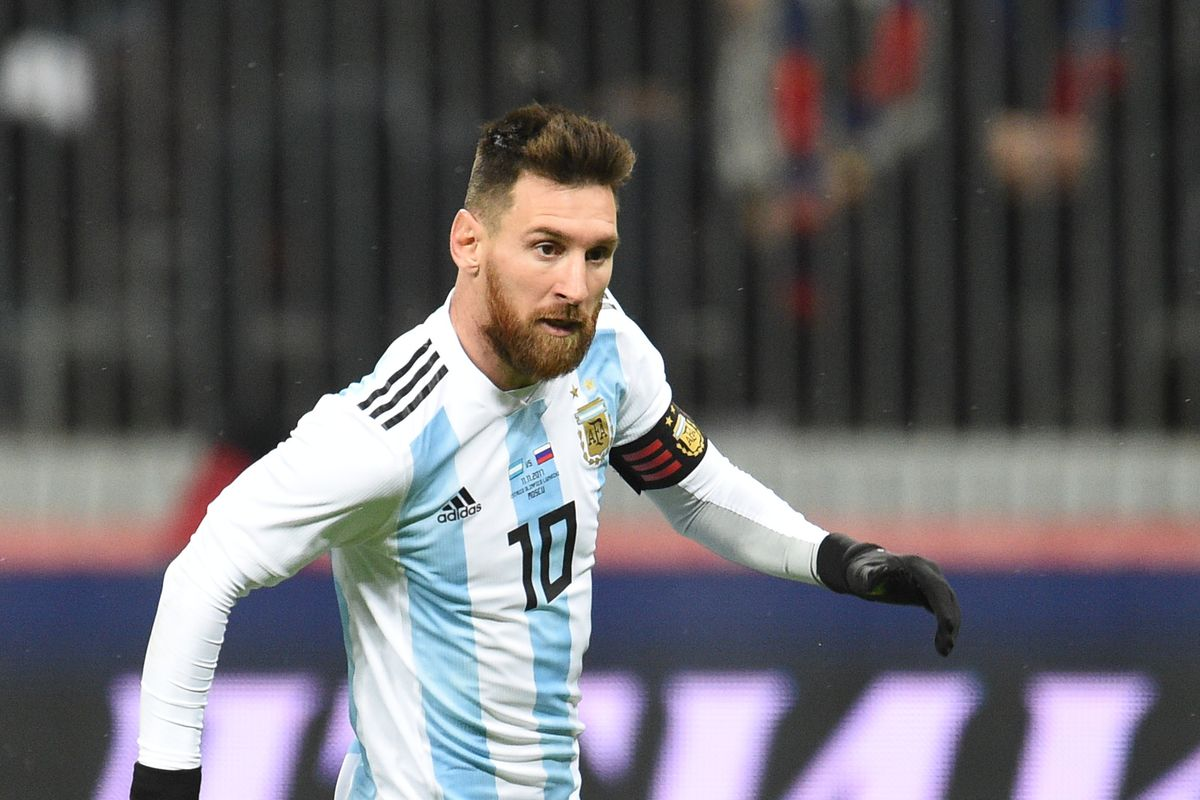

In [8]:
Image(filename="images/messi.jpg")

### 3.8 Belgium
The Red Devils has some of the best players in English Premier League, but can't never seem to make it far in the national level. Can Hazard and De Bruyne drive them far this time?

In [46]:
Belgium = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Belgium'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Belgium.set_index('Nationality', inplace = True)
Belgium[['Overall', 'Potential']] = Belgium[['Overall', 'Potential']].astype(float)

print (Belgium)

               Squad  Overall  Potential
Nationality                             
Belgium        3-4-3    83.91      86.55
Belgium        4-4-2    83.36      86.73
Belgium      4-3-1-2    83.09      86.09
Belgium        4-3-3    84.27      87.27
Belgium      4-2-3-1    84.00      87.00


Again, 4-3-3 is the best formation for Belgium's both current and future squad.

In [47]:
rating_433_BEL_Overall, best_list_433_BEL_Overall = get_best_squad_n(squad_433_strict, 'Belgium', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Overall))
print(best_list_433_BEL_Overall)

-Overall-
Average rating: 84.3
Position           Player Overall Age               Club   Value   Wage
     GK      T. Courtois      89  25            Chelsea    €59M  €190K
     RB         T. Foket      73  22           KAA Gent   €5.5M   €19K
     CB  T. Alderweireld      86  28  Tottenham Hotspur  €40.5M  €165K
     CB    J. Vertonghen      85  30  Tottenham Hotspur  €28.5M  €130K
     LB     T. Vermaelen      78  31       FC Barcelona     €7M  €120K
    CDM       M. Dembélé      83  29  Tottenham Hotspur    €25M  €115K
    CAM    R. Nainggolan      86  29               Roma  €42.5M  €130K
    CAM        A. Witsel      82  28                NaN      €0     €0
     RM     K. De Bruyne      89  26    Manchester City    €83M  €285K
     ST        R. Lukaku      86  24  Manchester United    €59M  €210K
     LW        E. Hazard      90  26            Chelsea  €90.5M  €295K


In [48]:
rating_433_BEL_Potential, best_list_433_BEL_Potential = get_best_squad_n(squad_433_strict, 'Belgium', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_BEL_Potential))
print(best_list_433_BEL_Potential)

-Potential-
Average rating: 87.3
Position           Player Potential Age               Club   Value   Wage
     GK      T. Courtois        92  25            Chelsea    €59M  €190K
     RB         T. Foket        79  22           KAA Gent   €5.5M   €19K
     CB  T. Alderweireld        87  28  Tottenham Hotspur  €40.5M  €165K
     CB    L. Dendoncker        86  22     RSC Anderlecht    €15M   €25K
     LB        J. Lukaku        83  22              Lazio    €10M   €39K
     CM          D. Rigo        84  18                PSV   €1.3M    €3K
    CAM     Y. Tielemans        90  20          AS Monaco  €23.5M   €35K
    CAM    R. Nainggolan        86  29               Roma  €42.5M  €130K
     RM     K. De Bruyne        92  26    Manchester City    €83M  €285K
     ST        R. Lukaku        90  24  Manchester United    €59M  €210K
     LW        E. Hazard        91  26            Chelsea  €90.5M  €295K


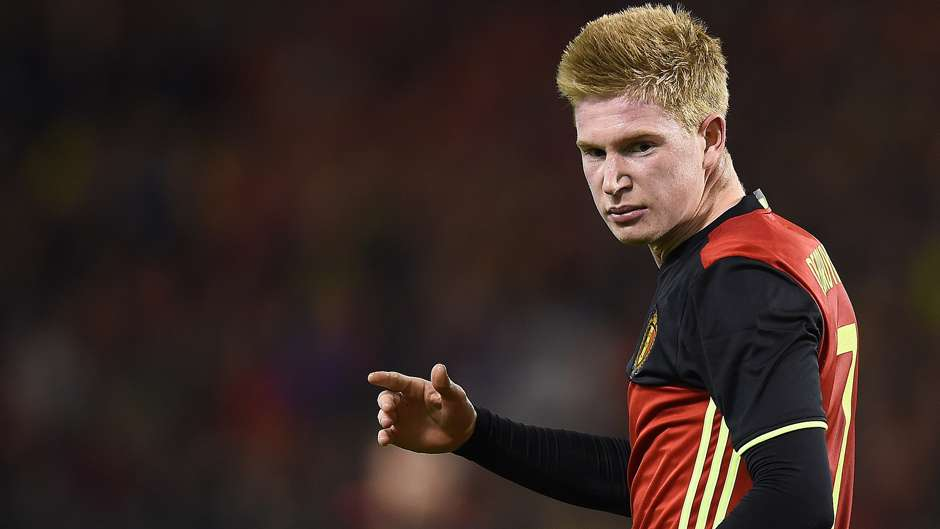

In [9]:
Image(filename="images/de-bruyne.jpg")

### 3.9 - Portugal
Last but not least, the winner of Euro 2016 and the best player in the world 3 times in a row, Cristiano Ronaldo.

In [49]:
Portugal = pd.DataFrame(np.array(get_summary_n(squad_list, squad_name, ['Portugal'])).reshape(-1,4), columns = ['Nationality', 'Squad', 'Overall', 'Potential'])
Portugal.set_index('Nationality', inplace = True)
Portugal[['Overall', 'Potential']] = Portugal[['Overall', 'Potential']].astype(float)

print (Portugal)

               Squad  Overall  Potential
Nationality                             
Portugal       3-4-3    83.00      87.00
Portugal       4-4-2    83.00      87.27
Portugal     4-3-1-2    82.82      86.55
Portugal       4-3-3    83.45      87.45
Portugal     4-2-3-1    83.45      87.27


OK, I'll go with 4-2-3-1 for current rating and 4-3-3 for potential rating of Portugal.

In [50]:
rating_4231_POR_Overall, best_list_4231_POR_Overall = get_best_squad_n(squad_4231_strict, 'Portugal', 'Overall')
print('-Overall-')
print('Average rating: {:.1f}'.format(rating_4231_POR_Overall))
print(best_list_4231_POR_Overall)

-Overall-
Average rating: 83.5
Position             Player Overall Age                Club   Value   Wage
     GK           A. Lopes      83  26  Olympique Lyonnais  €22.5M   €60K
     RB      Nélson Semedo      81  23        FC Barcelona  €20.5M  €125K
     CB               Pepe      86  34         Beşiktaş JK  €13.5M   €94K
     CB         José Fonte      79  33     West Ham United     €5M   €99K
     LB            Antunes      79  30           Getafe CF     €9M   €29K
     CM   William Carvalho      83  25         Sporting CP  €27.5M   €21K
     CM     Danilo Pereira      83  25            FC Porto  €27.5M   €18K
     RM     Bernardo Silva      84  22     Manchester City  €43.5M  €165K
    CAM         João Mário      83  24               Inter    €34M   €70K
     LM               Nani      83  30               Lazio  €24.5M   €47K
     ST  Cristiano Ronaldo      94  32      Real Madrid CF  €95.5M  €565K


In [51]:
rating_433_POR_Potential, best_list_433_POR_Potential = get_best_squad_n(squad_433_strict, 'Portugal', 'Potential')
print('-Potential-')
print('Average rating: {:.1f}'.format(rating_433_POR_Potential))
print(best_list_433_POR_Potential)

-Potential-
Average rating: 87.5
Position             Player Potential Age                Club   Value   Wage
     GK           A. Lopes        86  26  Olympique Lyonnais  €22.5M   €60K
     RB      Nélson Semedo        87  23        FC Barcelona  €20.5M  €125K
     CB               Pepe        86  34         Beşiktaş JK  €13.5M   €94K
     CB       Rúben Semedo        85  23       Villarreal CF  €12.5M   €27K
     LB        Rafa Soares        83  22              Fulham   €8.5M   €11K
     CM   William Carvalho        86  25         Sporting CP  €27.5M   €21K
    CAM         João Mário        88  24               Inter    €34M   €70K
    CAM        André Gomes        88  23        FC Barcelona    €30M  €150K
     RM     Bernardo Silva        91  22     Manchester City  €43.5M  €165K
     ST  Cristiano Ronaldo        94  32      Real Madrid CF  €95.5M  €565K
     LM     Gelson Martins        88  22         Sporting CP    €25M   €20K


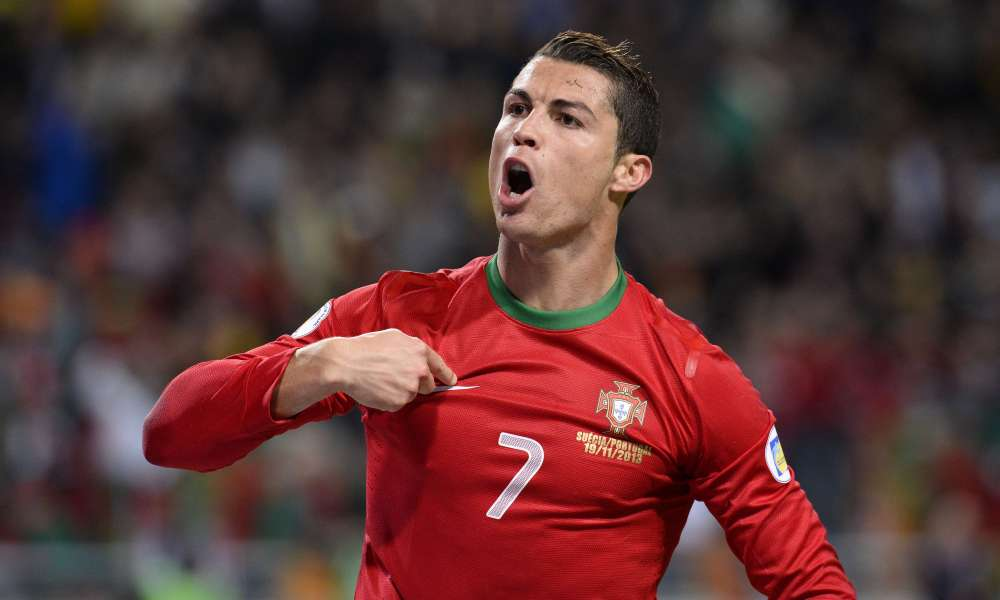

In [10]:
Image(filename="images/ronaldo.jpg")

## 4 - Final Comparison
Ok, let's make some comparison between these 8 line-ups with the current rating of players for these strongest contenders for World Cup 2018.

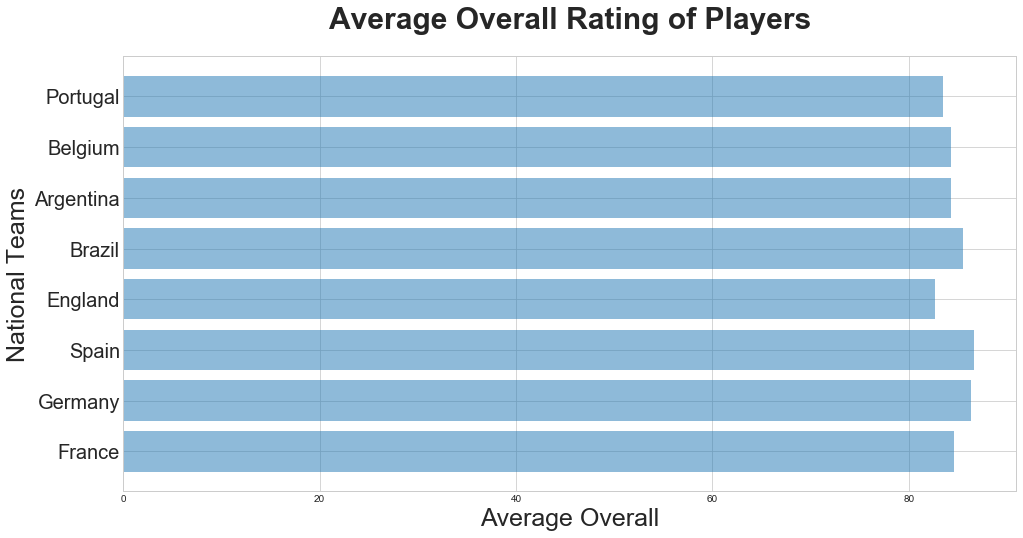

In [61]:
teams = ('France', 'Germany', 'Spain', 'England', 'Brazil', 'Argentina', 'Belgium', 'Portugal')
index = np.arange(len(teams))
average_overall = [84.6, 86.3, 86.6, 82.7, 85.5, 84.3, 84.3, 83.5]

plt.figure(figsize=(16,8))
plt.barh(index, average_overall, align='center', alpha=0.5)
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Overall', fontsize=25)
plt.title('Average Overall Rating of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

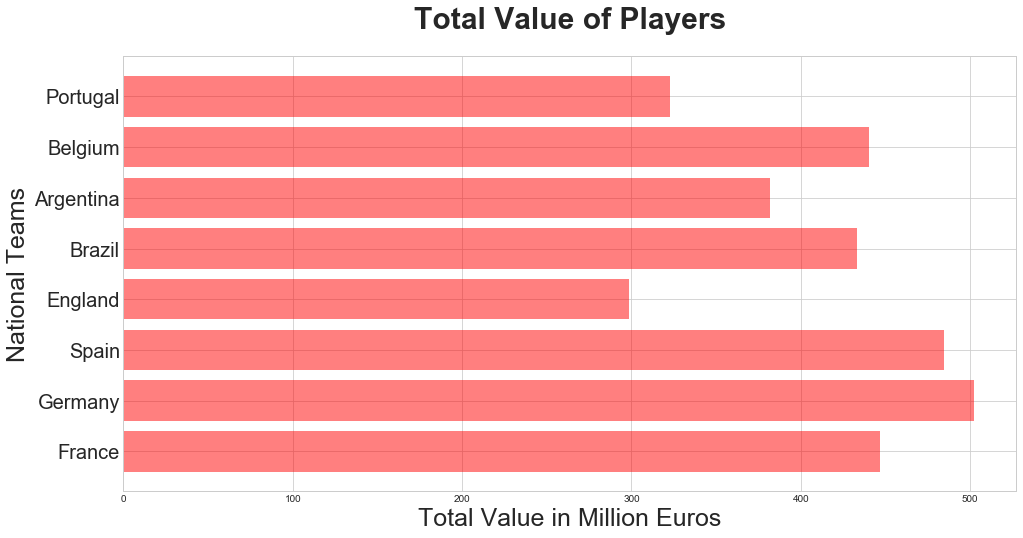

In [62]:
total_value = [446.5, 502, 484.5, 298.5, 433, 382, 440.5, 323]

plt.figure(figsize=(16,8))
plt.barh(index, total_value, align='center', alpha=0.5, color='red')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Total Value in Million Euros', fontsize=25)
plt.title('Total Value of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

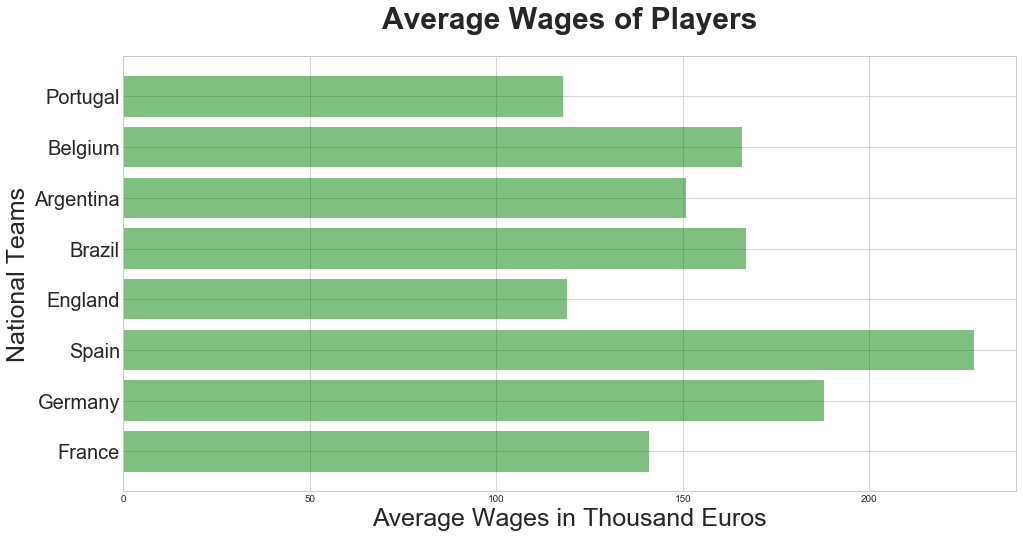

In [63]:
average_wage = [141, 188, 228, 119, 167, 151, 166, 118]

plt.figure(figsize=(16,8))
plt.barh(index, average_wage, align='center', alpha=0.5, color='green')
plt.yticks(index, teams, fontsize=20)
plt.ylabel('National Teams', fontsize=25)
plt.xlabel('Average Wages in Thousand Euros', fontsize=25)
plt.title('Average Wages of Players', fontsize=30, fontweight='bold', y=1.05,)
 
plt.show()

## Conclusion
So based purely on the FIFA 18 Data:
* Spain has the highest average overall rating, followed by Germany and Brazil. 
* Germany has the highest total value, followed by Spain and France. 
* Spain has the highest average wage, followed by Germany and Brazil.

My bet is for a **Spain vs Germany** in the final, and **Brazil vs France** for the 3rd place. Your turn?